In [1]:
# Dependencies
from citipy import citipy
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import requests

In [2]:
#Read worldcities.csv from citipy
api_key= "518f982824caeb562219656130eaf212"
worldcities = "citipy/worldcities.csv"
cities_df = pd.read_csv(worldcities)

In [3]:
#sample random from cities_df
selected_cities = cities_df.sample(n=500)
five_cities= selected_cities.reset_index()
five_cities.drop(["index"], axis=1, inplace = True)

In [4]:
city_weather = five_cities

In [5]:
# Create blank columns for necessary fields
city_weather["Temperature (F)"] = ""
city_weather["Humidity (%)"] = ""
city_weather["Cloudiness (%)"] = ""
city_weather["Wind Speed (mph)"] = ""

In [6]:
# Counter
row_count = 1

# Loop through and grab the lat/lng using Google maps
for index, row in city_weather.iterrows():
    
    # Create endpoint URL
    target_url = "http://api.openweathermap.org/data/2.5/weather?lat=%s&lon=%s&APPID=%s&units=imperial" % (city_weather.iloc[index]["Latitude"], city_weather.iloc[index]["Longitude"], api_key)
    # Print log to ensure loop is working correctly
    print("Processing Record " + str(row_count) + " of 500 | " + city_weather.iloc[index]["City"])
    print(target_url)
    row_count += 1
    
    # Run requests to grab the JSON at the requested URL
    weather_location = requests.get(target_url).json()
    
    # Append the max temp, humidity, cloud %, and wind speed to the appropriate columns
    # Use try / except to skip any cities with errors
    try: 
        weather_temp = weather_location["main"]["temp_max"]
        weather_humid = weather_location["main"]["humidity"]
        weather_cloud = weather_location["clouds"]["all"]
        weather_wind = weather_location["wind"]["speed"]
        
        city_weather.set_value(index, "Temperature (F)", weather_temp)
        city_weather.set_value(index, "Humidity (%)", weather_humid)
        city_weather.set_value(index, "Cloudiness (%)", weather_cloud)
        city_weather.set_value(index, "Wind Speed (mph)", weather_wind)
        
    except:
        print("Error with city data. Skipping")
        continue
        
# Visualize
city_weather.head()

Processing Record 1 of 500 | paullo
http://api.openweathermap.org/data/2.5/weather?lat=45.416667&lon=9.4&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 2 of 500 | poysdorf
http://api.openweathermap.org/data/2.5/weather?lat=48.666667&lon=16.633333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 3 of 500 | jhajjar
http://api.openweathermap.org/data/2.5/weather?lat=28.616667&lon=76.65&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 4 of 500 | kamenz
http://api.openweathermap.org/data/2.5/weather?lat=51.266667&lon=14.1&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 5 of 500 | malihabad
http://api.openweathermap.org/data/2.5/weather?lat=26.916667&lon=80.716667&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 6 of 500 | el aguila
http://api.openweathermap.org/data/2.5/weather?lat=4.91345&lon=-76.040042&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record

Processing Record 51 of 500 | petropavlivka
http://api.openweathermap.org/data/2.5/weather?lat=48.456429&lon=36.436699&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 52 of 500 | kolga
http://api.openweathermap.org/data/2.5/weather?lat=59.4866667&lon=25.6191667&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 53 of 500 | baryshevo
http://api.openweathermap.org/data/2.5/weather?lat=54.9564&lon=83.1822&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 54 of 500 | wembley
http://api.openweathermap.org/data/2.5/weather?lat=55.15&lon=-119.15&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 55 of 500 | alexandria
http://api.openweathermap.org/data/2.5/weather?lat=43.983333&lon=25.333333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 56 of 500 | findlay
http://api.openweathermap.org/data/2.5/weather?lat=41.0441667&lon=-83.65&APPID=518f982824caeb562219656130eaf212&units=imperial

Processing Record 100 of 500 | palestina
http://api.openweathermap.org/data/2.5/weather?lat=-1.9333333&lon=-79.7333333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 101 of 500 | lencois paulista
http://api.openweathermap.org/data/2.5/weather?lat=-22.6&lon=-48.783333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 102 of 500 | yakuplu
http://api.openweathermap.org/data/2.5/weather?lat=40.983333&lon=28.65&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 103 of 500 | barbatesti
http://api.openweathermap.org/data/2.5/weather?lat=44.866667&lon=23.5&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 104 of 500 | komarichi
http://api.openweathermap.org/data/2.5/weather?lat=52.4151&lon=34.7905&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 105 of 500 | tequila
http://api.openweathermap.org/data/2.5/weather?lat=20.883333&lon=-103.833333&APPID=518f982824caeb562219656130eaf212&un

Processing Record 149 of 500 | taggia
http://api.openweathermap.org/data/2.5/weather?lat=43.866667&lon=7.85&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 150 of 500 | aksu
http://api.openweathermap.org/data/2.5/weather?lat=41.123056&lon=80.264444&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 151 of 500 | apopka
http://api.openweathermap.org/data/2.5/weather?lat=28.6802778&lon=-81.5097222&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 152 of 500 | krasnyy oktyabr
http://api.openweathermap.org/data/2.5/weather?lat=48.25&lon=38.2&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 153 of 500 | hooglede
http://api.openweathermap.org/data/2.5/weather?lat=50.983333&lon=3.083333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 154 of 500 | kongwa
http://api.openweathermap.org/data/2.5/weather?lat=-6.2&lon=36.4166667&APPID=518f982824caeb562219656130eaf212&units=imperial
Proce

Processing Record 198 of 500 | zhovtneve
http://api.openweathermap.org/data/2.5/weather?lat=49.987839&lon=29.531292&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 199 of 500 | berehove
http://api.openweathermap.org/data/2.5/weather?lat=44.901477&lon=33.621587&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 200 of 500 | chieri
http://api.openweathermap.org/data/2.5/weather?lat=45.016667&lon=7.816667&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 201 of 500 | reitoca
http://api.openweathermap.org/data/2.5/weather?lat=13.8258333&lon=-87.4652778&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 202 of 500 | tarbagatay
http://api.openweathermap.org/data/2.5/weather?lat=51.1747&lon=109.0931&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 203 of 500 | valparaiso
http://api.openweathermap.org/data/2.5/weather?lat=41.4730556&lon=-87.0611111&APPID=518f982824caeb562219656130eaf2

Processing Record 247 of 500 | iwakuni
http://api.openweathermap.org/data/2.5/weather?lat=34.15&lon=132.183333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 248 of 500 | nyzhnya krynka
http://api.openweathermap.org/data/2.5/weather?lat=48.113497&lon=38.160636&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 249 of 500 | belyy gorodok
http://api.openweathermap.org/data/2.5/weather?lat=56.965&lon=37.5125&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 250 of 500 | ulles
http://api.openweathermap.org/data/2.5/weather?lat=46.336114&lon=19.844544&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 251 of 500 | san roque
http://api.openweathermap.org/data/2.5/weather?lat=15.261463&lon=120.651831&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 252 of 500 | fuyang
http://api.openweathermap.org/data/2.5/weather?lat=32.9&lon=115.816667&APPID=518f982824caeb562219656130eaf212&units=

Processing Record 296 of 500 | sebaco
http://api.openweathermap.org/data/2.5/weather?lat=12.8511111&lon=-86.0994444&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 297 of 500 | kadubivtsi
http://api.openweathermap.org/data/2.5/weather?lat=48.583372&lon=25.76871&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 298 of 500 | alausi
http://api.openweathermap.org/data/2.5/weather?lat=-2.2&lon=-78.8333333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 299 of 500 | canora
http://api.openweathermap.org/data/2.5/weather?lat=51.633333&lon=-102.433333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 300 of 500 | kaniama
http://api.openweathermap.org/data/2.5/weather?lat=-7.516667&lon=24.183333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 301 of 500 | nazira
http://api.openweathermap.org/data/2.5/weather?lat=26.916667&lon=94.733333&APPID=518f982824caeb562219656130eaf212&units=i

Processing Record 345 of 500 | elati
http://api.openweathermap.org/data/2.5/weather?lat=39.5038889&lon=21.5347222&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 346 of 500 | yeadon
http://api.openweathermap.org/data/2.5/weather?lat=39.9388889&lon=-75.2558333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 347 of 500 | kigoma
http://api.openweathermap.org/data/2.5/weather?lat=-4.8769444&lon=29.6266667&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 348 of 500 | susanville
http://api.openweathermap.org/data/2.5/weather?lat=40.4163889&lon=-120.6519444&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 349 of 500 | priiskovyy
http://api.openweathermap.org/data/2.5/weather?lat=54.656111&lon=88.687222&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 350 of 500 | insuratei
http://api.openweathermap.org/data/2.5/weather?lat=44.916667&lon=27.6&APPID=518f982824caeb562219656130eaf2

Processing Record 394 of 500 | rheinfelden
http://api.openweathermap.org/data/2.5/weather?lat=47.566667&lon=7.8&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 395 of 500 | tyarlevo
http://api.openweathermap.org/data/2.5/weather?lat=59.700556&lon=30.456389&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 396 of 500 | ragusa
http://api.openweathermap.org/data/2.5/weather?lat=36.916667&lon=14.733333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 397 of 500 | cleveland
http://api.openweathermap.org/data/2.5/weather?lat=33.7438889&lon=-90.7247222&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 398 of 500 | bethausen
http://api.openweathermap.org/data/2.5/weather?lat=45.833056&lon=21.952778&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 399 of 500 | bokaa
http://api.openweathermap.org/data/2.5/weather?lat=-24.45&lon=26.0166667&APPID=518f982824caeb562219656130eaf212&units=

Processing Record 443 of 500 | viking
http://api.openweathermap.org/data/2.5/weather?lat=53.083333&lon=-111.783333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 444 of 500 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?lat=71.433333&lon=136.066667&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 445 of 500 | managpi
http://api.openweathermap.org/data/2.5/weather?lat=13.3108&lon=121.204&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 446 of 500 | qui nhon
http://api.openweathermap.org/data/2.5/weather?lat=13.766667&lon=109.233333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 447 of 500 | bhopal
http://api.openweathermap.org/data/2.5/weather?lat=23.266667&lon=77.4&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 448 of 500 | schouweiler
http://api.openweathermap.org/data/2.5/weather?lat=49.5825&lon=5.9563889&APPID=518f982824caeb562219656130eaf212&units=i

Processing Record 492 of 500 | marantao
http://api.openweathermap.org/data/2.5/weather?lat=7.95&lon=124.233333&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 493 of 500 | leuna
http://api.openweathermap.org/data/2.5/weather?lat=51.316667&lon=12.016667&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 494 of 500 | sabana grande de boya
http://api.openweathermap.org/data/2.5/weather?lat=18.95&lon=-69.8&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 495 of 500 | agotnes
http://api.openweathermap.org/data/2.5/weather?lat=60.406111&lon=5.018889&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 496 of 500 | coron
http://api.openweathermap.org/data/2.5/weather?lat=11.9986&lon=120.2043&APPID=518f982824caeb562219656130eaf212&units=imperial
Processing Record 497 of 500 | dabat
http://api.openweathermap.org/data/2.5/weather?lat=12.984167&lon=37.765&APPID=518f982824caeb562219656130eaf212&units=imperial
Pr

,Country,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,it,paullo,45.416667,9.400000,51.8,66,0,11.41
1,at,poysdorf,48.666667,16.633333,50,76,0,12.75
2,in,jhajjar,28.616667,76.650000,71.6,53,0,3.36
3,de,kamenz,51.266667,14.100000,48.2,100,90,4.7
4,in,malihabad,26.916667,80.716667,71.6,83,0,4.38


In [7]:
city_weather.to_csv("WeatherPy_csv_SL", sep='\t')

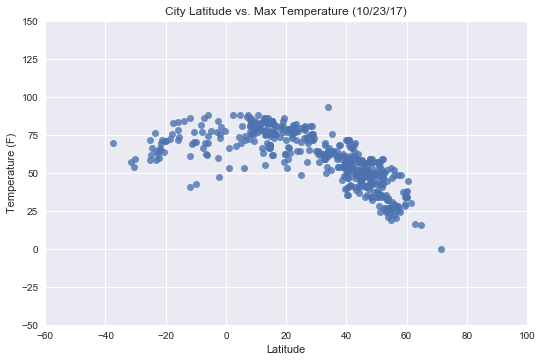

In [13]:
#Temperature vs Latitude
# Set style of scatterplot
sns.set()

# Create scatterplot of dataframe
sns.lmplot('Latitude', 'Temperature (F)', data=city_weather, aspect = 1.5, fit_reg=False) 

# Set title and labels
plt.title('City Latitude vs. Max Temperature (10/23/17)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.ylim(-50,150)
plt.xlim(-60,100)

tempvslat = plt.gcf()
plt.savefig('tempvslat.png')
plt.show()

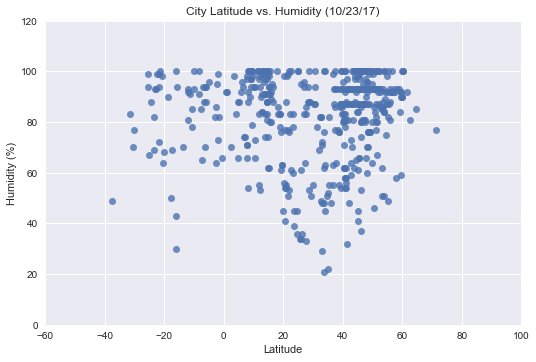

In [14]:
#Humidity vs Latitude
# Set style of scatterplot
sns.set()

# Create scatterplot of dataframe
sns.lmplot("Latitude", "Humidity (%)", aspect = 1.5, data=city_weather, fit_reg=False) 

# Set title and labels
plt.title('City Latitude vs. Humidity (10/23/17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.ylim(0,120)
plt.xlim(-60,100)

humivslat = plt.gcf()
plt.savefig('humidityvslat.png')
plt.show()

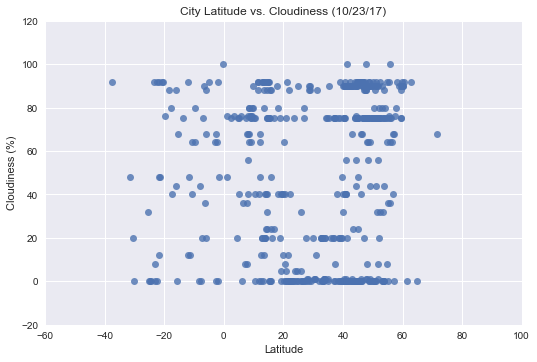

In [15]:
#Cloudiness vs Latitude
# Set style of scatterplot
sns.set()

# Create scatterplot of dataframe
sns.lmplot("Latitude", "Cloudiness (%)", aspect = 1.5, data=city_weather, fit_reg=False) 

# Set title and labels
plt.title('City Latitude vs. Cloudiness (10/23/17)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.ylim(-20,120)
plt.xlim(-60,100)

cloudvslat = plt.gcf()
plt.savefig('cloudinessvslat.png')
plt.show()

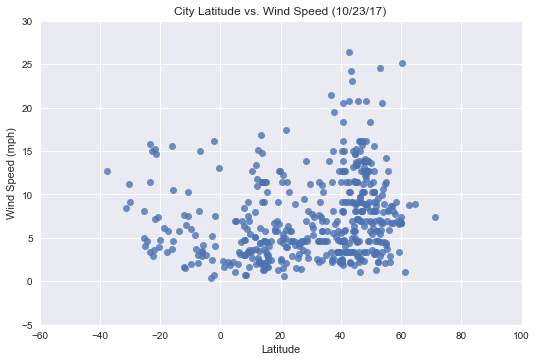

In [17]:
#Wind Speed vs Latitude
# Set style of scatterplot
sns.set()

# Create scatterplot of dataframe
sns.lmplot("Latitude", "Wind Speed (mph)", aspect = 1.5, data=city_weather, fit_reg=False) 

# Set title and labels
plt.title('City Latitude vs. Wind Speed (10/23/17)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.ylim(-5,30)
plt.xlim(-60,100)

windvslat = plt.gcf()
plt.savefig('windvslat.png')
plt.show()

Three observable trends for month of October:
1. The higher the city's latitude, the lower the maximum temperature.
2. The higher the city's latitude, the more likely that the humidity will be higher.
3. The higher the city's latitude, the more likely that the wind speed will be higher.